# Concepts

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Autocorrelation

It is the degree of similarity between a given time series and a lagged version of itself over successive time intervals

Autocorrelation is included in Lag plot as it is a statstic which can be deduced from it.

In [32]:
# Durbin-Watson test for autocorrelation:
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


class LagPlot:
    def __init__(self, df, val, lag = 1):
        self.df = df
        self.val = val
        self.lag = lag
    
    def saveplot(self, filename, show = False):
        fig, ax = plt.subplots(figsize = (12,7))
        pd.plotting.lag_plot(self.df[self.val], lag=self.lag)
        fig.savefig('plots/' + filename +'.png')
        if show:
            fig.show()
    
    def autocorrelation(self):
        values = pd.DataFrame(self.df[self.val].values)
        df = pd.concat([values.shift(self.lag), values],axis=1)
        df.columns = ['X', 'y']
        df.dropna(axis = 0, inplace=True)
        y_test = df['X'].to_numpy()
        y_pred = df['y'].to_numpy()
        residuals = y_pred - y_test 
        return durbin_watson(residuals)

    # def summary(self):

In [34]:
df = pd.read_csv('data/2/monthly-beer-production-in-austr.csv')

In [35]:
lp = LagPlot(df, 'Monthly beer production')


/tmp/ipykernel_17137/2019143491.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


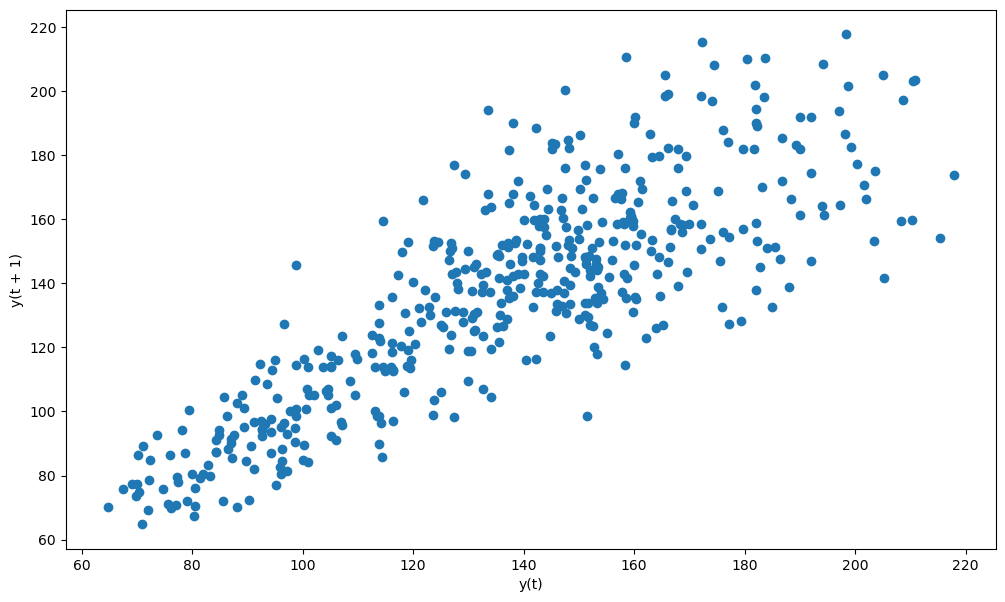

In [36]:
lp.saveplot('lagplot', True)

In [37]:
lp.autocorrelation()

2.4488998567747133

### Summary generation:
        Positive autocorrelation does not exist if value is close to 2
        Value less than 2 may signify positive autocorrelation
        Value more than 2 may signify negative autocorrelation